In [7]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Available files: []

Loading: C:\Dev\dAmpIng26\git\struct-engineer-ai\neuralnet\src\peer_earthquake_data\peer_earthquake_dataset_it_1.json
Total earthquakes: 50

First earthquake:
{
  "id": "synthetic_peer_001",
  "magnitude": 5.697570034518412,
  "pga_g": 0.42417414069846016,
  "pga_ms2": 4.161148320251894,
  "duration": 28.48785017259206,
  "dt": 0.02,
  "npts": 1425,
  "acceleration": [
    0.0,
    2.3317049187515284e-05,
    7.532737454195366e-05,
    -6.012104097958066e-05,
    0.00012003082588464641,
    -5.9309297371824055e-05,
    6.720880870660084e-05,
    -0.000517835655290257,
    0.0009107410698483747,
    0.0009932008376362007,
    0.0015977653897905411,
    0.00523862849119182,
    0.003458054223363714,
    0.004086326742234314,
    0.004369726664808088,
    0.004910944006454723,
    0.0021744684195997657,
    0.0031764467997555186,
    0.0035451617449573573,
    0.005280380455130771,
    0.009982309656550031,
    0.01777628454099867,
    0.015086882194428629,
    0.0178

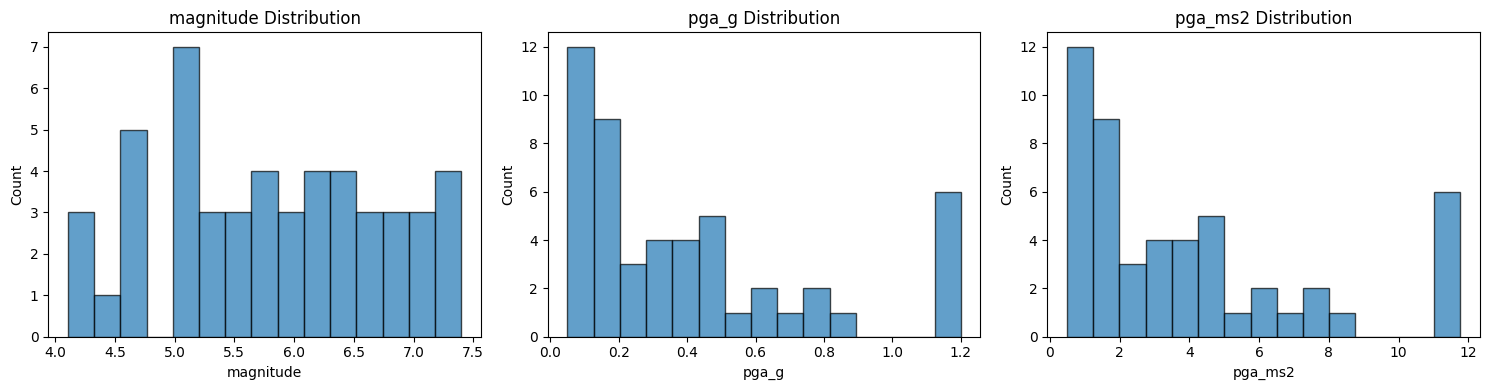


=== Missing Data ===
id              0
magnitude       0
pga_g           0
pga_ms2         0
duration        0
dt              0
npts            0
acceleration    0
time            0
source          0
dtype: int64

=== Correlation Matrix ===
           magnitude     pga_g   pga_ms2  duration  dt      npts
magnitude   1.000000  0.849175  0.849175  1.000000 NaN  0.999999
pga_g       0.849175  1.000000  1.000000  0.849175 NaN  0.849123
pga_ms2     0.849175  1.000000  1.000000  0.849175 NaN  0.849123
duration    1.000000  0.849175  0.849175  1.000000 NaN  0.999999
dt               NaN       NaN       NaN       NaN NaN       NaN
npts        0.999999  0.849123  0.849123  0.999999 NaN  1.000000


In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Find the correct dataset file
data_dir = Path("../peer_earthquake_data")
data_files = list(data_dir.glob("*.json"))
print(f"Available files: {[f.name for f in data_files]}\n")

# Load the first/correct file
data_file = data_files[0] if data_files else Path("C:\\Dev\\dAmpIng26\\git\\struct-engineer-ai\\neuralnet\\src\\peer_earthquake_data\\peer_earthquake_dataset_it_1.json")
print(f"Loading: {data_file}")

if not data_file.exists():
    raise FileNotFoundError(f"Dataset not found at {data_file}")

with open(data_file, 'r') as f:
    earthquakes = json.load(f)

print(f"Total earthquakes: {len(earthquakes)}")
print(f"\nFirst earthquake:\n{json.dumps(earthquakes[0], indent=2)}\n")

# Convert to DataFrame
df = pd.DataFrame(earthquakes)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}\n")

# Display basic info
print(df.head())
print(f"\nData types:\n{df.dtypes}")
print(f"\nBasic statistics:\n{df.describe()}")

# Analyze distributions (adjust column names to match your data)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {numeric_cols}")

if len(numeric_cols) >= 3:
    fig, axes = plt.subplots(1, min(3, len(numeric_cols)), figsize=(15, 4))
    for idx, col in enumerate(numeric_cols[:3]):
        axes[idx].hist(df[col].dropna(), bins=15, edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].set_title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

# Check for missing data
print("\n=== Missing Data ===")
print(df.isnull().sum())

# Correlation
print("\n=== Correlation Matrix ===")
print(df[numeric_cols].corr())

=== Acceleration Analysis ===
Total acceleration data points: 72596
Average acceleration per earthquake: 1451.9
Min acceleration: -11.7720
Max acceleration: 11.7720
Mean acceleration: -0.0014
Std acceleration: 1.5017


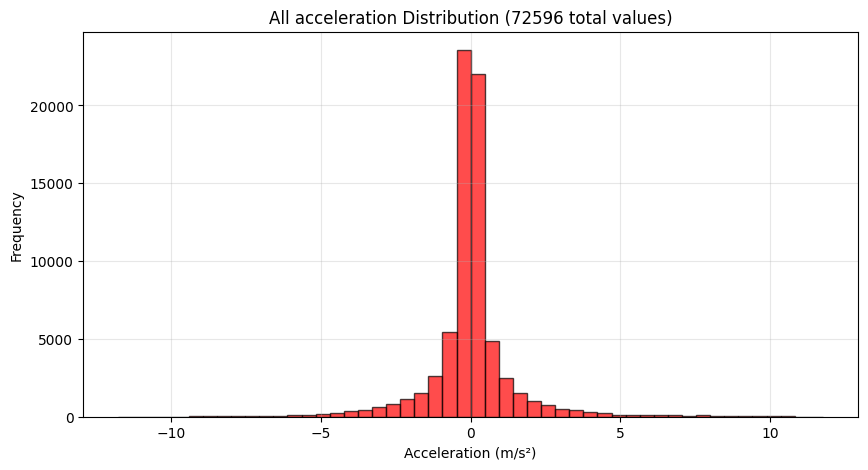

In [12]:
# Count acceleration
print("=== Acceleration Analysis ===")

# If acceleration are stored as a list/array in each earthquake record
if 'acceleration' in df.columns:
    total_acceleration_values = sum(df['acceleration'].apply(lambda x: len(x) if isinstance(x, list) else 1))
    print(f"Total acceleration data points: {total_acceleration_values}")
    print(f"Average acceleration per earthquake: {total_acceleration_values / len(df):.1f}")
    
    # Flatten all acceleration into one array
    all_acceleration = []
    for acc_list in df['acceleration']:
        if isinstance(acc_list, list):
            all_acceleration.extend(acc_list)
        else:
            all_acceleration.append(acc_list)
    
    print(f"Min acceleration: {min(all_acceleration):.4f}")
    print(f"Max acceleration: {max(all_acceleration):.4f}")
    print(f"Mean acceleration: {np.mean(all_acceleration):.4f}")
    print(f"Std acceleration: {np.std(all_acceleration):.4f}")
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(all_acceleration, bins=50, edgecolor='black', alpha=0.7, color='red')
    plt.xlabel('Acceleration (m/s²)')
    plt.ylabel('Frequency')
    plt.title(f'All acceleration Distribution ({len(all_acceleration)} total values)')
    plt.grid(True, alpha=0.3)
    plt.show()

elif 'pga' in df.columns:
    # If only PGA (peak ground acceleration) is stored
    print(f"Total earthquakes with PGA: {len(df)}")
    print(f"PGA range: {df['pga'].min():.4f}g - {df['pga'].max():.4f}g")
    print(f"Mean PGA: {df['pga'].mean():.4f}g")
    print(f"Std PGA: {df['pga'].std():.4f}g")
else:
    print("No acceleration column found. Available columns:")
    print(df.columns.tolist())

In [14]:
print(min(100, 200 // 10))

20


✅ Network diagram saved as 'nn_architecture_diagram.png'


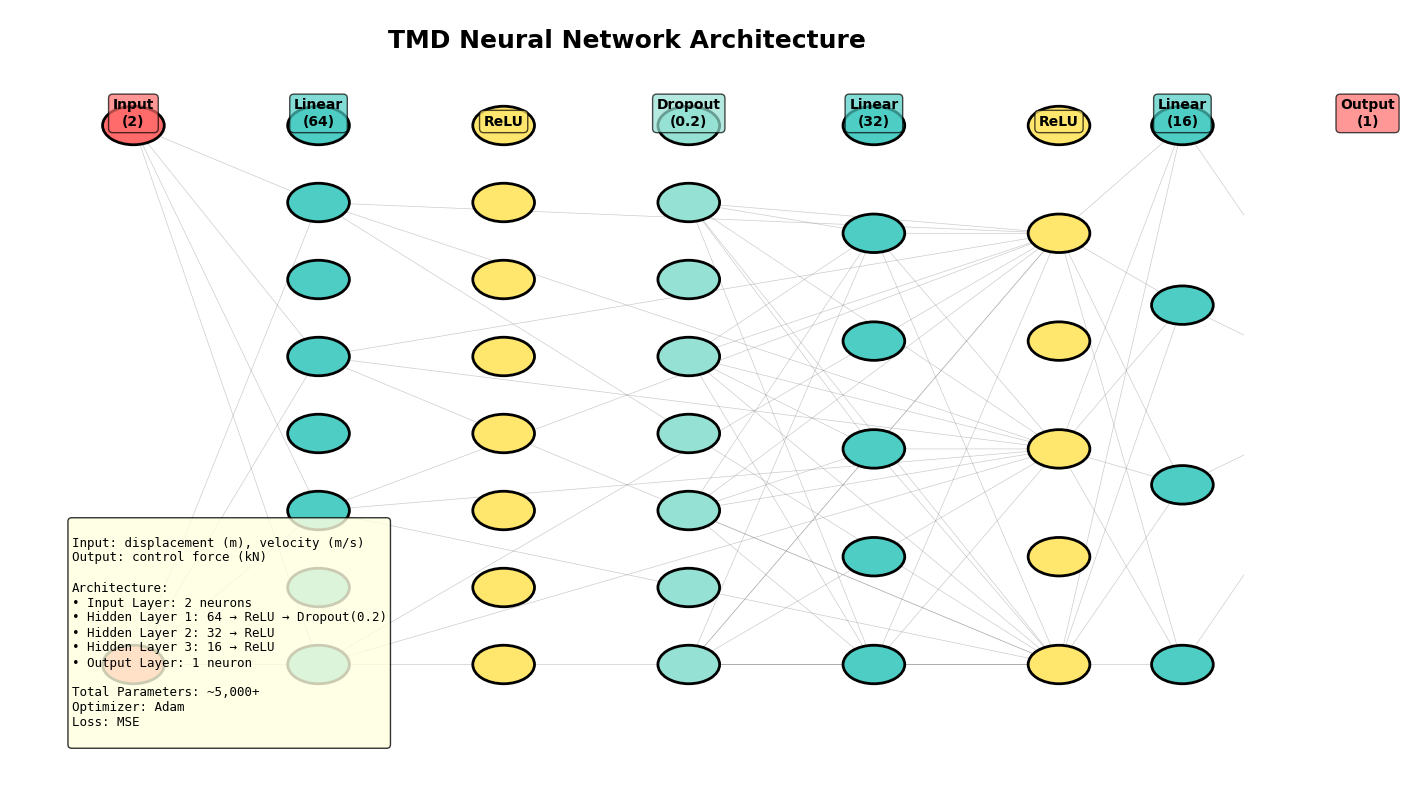

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(5, 9.5, 'TMD Neural Network Architecture', fontsize=18, fontweight='bold', ha='center')

# Layer definitions: (x_pos, layer_name, num_neurons, color)
layers = [
    (1, 'Input\n(2)', 2, '#FF6B6B'),
    (2.5, 'Linear\n(64)', 8, '#4ECDC4'),
    (4, 'ReLU', 8, '#FFE66D'),
    (5.5, 'Dropout\n(0.2)', 8, '#95E1D3'),
    (7, 'Linear\n(32)', 6, '#4ECDC4'),
    (8.5, 'ReLU', 6, '#FFE66D'),
]

# Draw layers
neuron_positions = {}

for x_pos, layer_name, num_neurons, color in layers:
    # Calculate vertical spacing
    y_spacing = 7 / (num_neurons - 1) if num_neurons > 1 else 3.5
    y_start = 5 - (7 / 2)
    
    neuron_positions[layer_name] = []
    
    # Draw neurons
    for i in range(num_neurons):
        y = y_start + i * y_spacing
        circle = patches.Circle((x_pos, y), 0.25, color=color, ec='black', linewidth=2, zorder=3)
        ax.add_patch(circle)
        neuron_positions[layer_name].append((x_pos, y))
    
    # Add layer label
    ax.text(x_pos, 8.5, layer_name, fontsize=10, fontweight='bold', ha='center', 
            bbox=dict(boxstyle='round', facecolor=color, alpha=0.7))

# Hidden layer 2
x_pos, num_neurons = 9.5, 4
y_spacing = 7 / (num_neurons - 1) if num_neurons > 1 else 3.5
y_start = 5 - (7 / 2)

neuron_positions['Linear\n(16)'] = []
for i in range(num_neurons):
    y = y_start + i * y_spacing
    circle = patches.Circle((x_pos, y), 0.25, color='#4ECDC4', ec='black', linewidth=2, zorder=3)
    ax.add_patch(circle)
    neuron_positions['Linear\n(16)'].append((x_pos, y))

ax.text(x_pos, 8.5, 'Linear\n(16)', fontsize=10, fontweight='bold', ha='center',
        bbox=dict(boxstyle='round', facecolor='#4ECDC4', alpha=0.7))

# Output layer
x_pos, num_neurons = 11, 1
neuron_positions['Output\n(1)'] = []
y = 5
circle = patches.Circle((x_pos, y), 0.25, color='#FF6B6B', ec='black', linewidth=2, zorder=3)
ax.add_patch(circle)
neuron_positions['Output\n(1)'].append((x_pos, y))

ax.text(x_pos, 8.5, 'Output\n(1)', fontsize=10, fontweight='bold', ha='center',
        bbox=dict(boxstyle='round', facecolor='#FF6B6B', alpha=0.7))

# Draw connections between layers (sample connections for clarity)
layer_sequence = [
    ('Input\n(2)', 'Linear\n(64)'),
    ('Linear\n(64)', 'ReLU'),
    ('ReLU', 'Dropout\n(0.2)'),
    ('Dropout\n(0.2)', 'Linear\n(32)'),
    ('Linear\n(32)', 'ReLU'),
    ('ReLU', 'Linear\n(16)'),
    ('Linear\n(16)', 'Output\n(1)'),
]

for src_layer, dst_layer in layer_sequence:
    src_positions = neuron_positions[src_layer]
    dst_positions = neuron_positions[dst_layer]
    
    # Draw connections (sample every nth for visibility)
    for src_pos in src_positions[::max(1, len(src_positions)//3)]:
        for dst_pos in dst_positions[::max(1, len(dst_positions)//3)]:
            arrow = FancyArrowPatch(src_pos, dst_pos, 
                                   arrowstyle='->', mutation_scale=15, 
                                   color='gray', linewidth=0.5, alpha=0.4, zorder=1)
            ax.add_patch(arrow)

# Add legend/info
info_text = """
Input: displacement (m), velocity (m/s)
Output: control force (kN)

Architecture:
• Input Layer: 2 neurons
• Hidden Layer 1: 64 → ReLU → Dropout(0.2)
• Hidden Layer 2: 32 → ReLU
• Hidden Layer 3: 16 → ReLU
• Output Layer: 1 neuron

Total Parameters: ~5,000+
Optimizer: Adam
Loss: MSE
"""

ax.text(0.5, 0.5, info_text, fontsize=9, family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.savefig('nn_architecture_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Network diagram saved as 'nn_architecture_diagram.png'")
plt.show()

In [13]:
# Count all dt (time steps) in the dataset
print("=== Dataset Time Step (dt) Analysis ===")

# Check if 'dt' column exists
if 'dt' in df.columns:
    total_dt_values = sum(df['dt'].apply(lambda x: len(x) if isinstance(x, list) else 1))
    print(f"Total dt data points: {total_dt_values}")
    print(f"Average dt per earthquake: {total_dt_values / len(df):.1f}")
    
    # Flatten all dt into one array
    all_dt = []
    for dt_list in df['dt']:
        if isinstance(dt_list, list):
            all_dt.extend(dt_list)
        else:
            all_dt.append(dt_list)
    
    print(f"Min dt: {min(all_dt):.6f}")
    print(f"Max dt: {max(all_dt):.6f}")
    print(f"Mean dt: {np.mean(all_dt):.6f}")
    print(f"Std dt: {np.std(all_dt):.6f}")

# Count total acceleration time series points (if accelerations stored as arrays)
elif 'accelerations' in df.columns or 'acceleration' in df.columns:
    col_name = 'accelerations' if 'accelerations' in df.columns else 'acceleration'
    total_points = sum(df[col_name].apply(lambda x: len(x) if isinstance(x, list) else 1))
    print(f"Total time series data points: {total_points}")
    print(f"Average points per earthquake: {total_points / len(df):.1f}")
    print(f"Total earthquakes: {len(df)}")

else:
    print("No dt column found.")
    print(f"\nAll columns: {df.columns.tolist()}")
    
    # Count all non-null values in numeric columns
    print("\n=== Total Data Points by Column ===")
    for col in df.columns:
        if df[col].dtype in [np.number]:
            print(f"{col}: {df[col].notna().sum()} values")

=== Dataset Time Step (dt) Analysis ===
Total dt data points: 50
Average dt per earthquake: 1.0
Min dt: 0.020000
Max dt: 0.020000
Mean dt: 0.020000
Std dt: 0.000000
